# 第8章　ベイズ推定：データを元に「確信」を高める手法

## 8.1 ベイズ推定モデルとベイズの定理

**[08BN-01]**

必要なモジュールをインポートします。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

from numpy.random import normal
from scipy.stats import norm

**[08BN-02]**

平均 $\mu=2$、分散 $\sigma^2=1$ の正規分布から 100 個のサンプルを取得します。

In [2]:
mu_true = 2.0
beta_true = 1.0
ds = normal(loc=mu_true, scale=np.sqrt(1.0/beta_true), size=100)

**[08BN-03]**

平均 $\mu$ の事前分布として平均 $\mu_0 = -2.0$、分散 $\sigma_0^2 = 1.0$ の正規分布を用いて、ベイズ推定による事後分布をグラフ表示する関数を用意します。

事前分布：
$$
P(\mu) = \mathcal N(\mu\mid\mu_0,\,\sigma_0^2)
$$

事後分布：
$$
P(\mu\mid\mathbf t) = \mathcal N(\mu\mid\mu_N,\,\beta_N^{-1})
$$

$$
\beta_N = N\beta + \beta_0\ \ \left(\beta=\frac{1}{\sigma^2},\,\beta_0=\frac{1}{\sigma_0^2}\right)
$$

$$
\mu_N = \frac{\displaystyle\beta\sum_{n=1}^Nt_n+\beta_0\mu_0}
{N\beta+\beta_0}
$$

In [3]:
def estimate_mu(subplot, trainset):
  # 事前分布
  mu_0 = -2.0
  beta_0 = 1.0

  # 事後分布
  n = len(trainset)
  mu_N = (beta_true*np.sum(trainset) + beta_0*mu_0) / (n*beta_true + beta_0)
  beta_N = n*beta_true + beta_0

  subplot.set_title('N={}'.format(n), fontsize=14)
  subplot.tick_params(axis='x', labelsize=12)
  subplot.tick_params(axis='y', labelsize=12)
  linex = np.linspace(-10, 10, 1000)

  # 平均μの事後分布を表示
  sigma = np.sqrt(1.0/beta_N)
  mu_est = norm(loc=mu_N, scale=sigma)
  label = 'mu={:.2f}\nsigma^2={:.2f}'.format(mu_N, sigma**2)
  subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
  subplot.legend(loc=2, fontsize=14)

  # トレーニングセットを表示
  subplot.scatter(trainset, [0.2]*n, marker='o', color='blue')
  subplot.set_xlim(-5, 5)
  subplot.set_ylim(0)

**[08BN-04]**

事前に生成した100 個のデータから、先頭の 2, 4, 10, 100 個分を用いて推定した結果をそれぞれグラフに表示します。

使用するデータが多くなるほど、事後分布の最大値部分が真の母数 2 に近づくと共に、事後分布の分散が小さくなることがわかります。

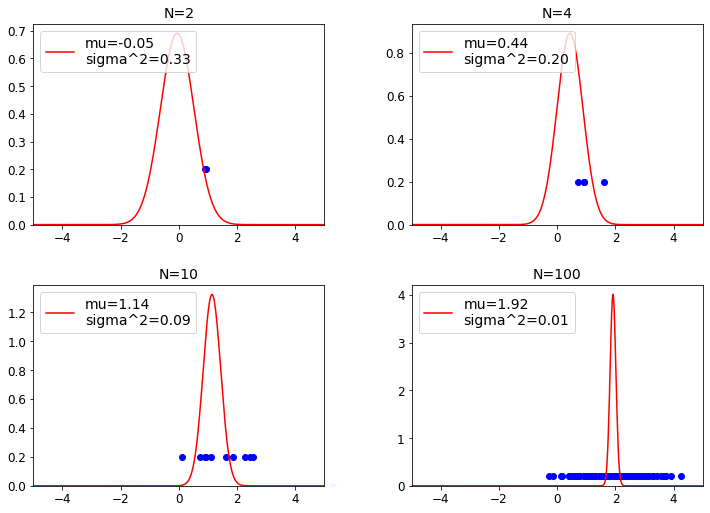

In [4]:
fig = plt.figure(figsize=(12, 8.5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for c, num in enumerate([2, 4, 10, 100]):
  subplot = fig.add_subplot(2, 2, c+1)
  estimate_mu(subplot, ds[:num])

**[08BN-05]**

ベイズ推定で得られた事後分布を用いて、次に得られるデータの予測分布をグラフ表示する関数を用意します。

予測分布：
$$
P(t) = \mathcal N(t\mid \mu_N,\,\beta^{-1}+\beta_N^{-1})
$$

In [5]:
def estimate_pdf(subplot, trainset):
  # 事前分布
  mu_0 = -2.0
  beta_0 = 1.0

  # 事後分布
  n = len(trainset)
  mu_N = (beta_true*np.sum(trainset) + beta_0*mu_0) / (n*beta_true + beta_0)
  beta_N = n*beta_true + beta_0

  subplot.set_title('N={}'.format(n), fontsize=14)
  subplot.tick_params(axis='x', labelsize=12)
  subplot.tick_params(axis='y', labelsize=12)
  linex = np.linspace(-10, 10, 1000)

  # 真の分布を表示
  orig = norm(loc=mu_true, scale=np.sqrt(1.0/beta_true))
  subplot.plot(linex, orig.pdf(linex), color='green', linestyle='--')

  # 予測分布を表示
  sigma = np.sqrt(1.0/beta_true+1.0/beta_N)
  mu_est = norm(loc=mu_N, scale=sigma)
  label = 'mu={:.2f}\nsigma^2={:.2f}'.format(mu_N, sigma**2)
  subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
  subplot.legend(loc=2, fontsize=14)

  # トレーニングセットを表示
  subplot.scatter(trainset, orig.pdf(trainset), marker='o', color='blue')
  subplot.set_xlim(-5, 5)
  subplot.set_ylim(0)

**[08BN-06]**

先ほどと同様に、推定に使用するデータ数を変化させながら、結果をグラフ表示していきます。

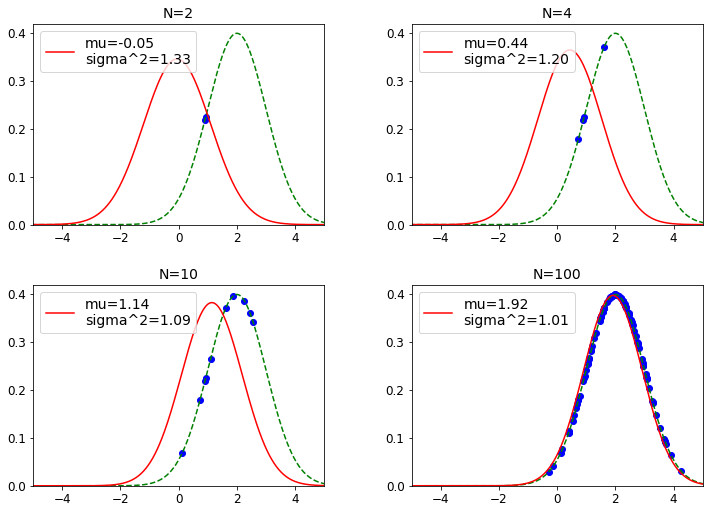

In [6]:
fig = plt.figure(figsize=(12, 8.5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for c, num in enumerate([2, 4, 10, 100]):
    subplot = fig.add_subplot(2, 2, c+1)
    estimate_pdf(subplot, ds[:num])